In [1]:
# run options
num_images = 100
device = "cuda"
quantizations = ["none", "skip_vision_tower", "full"]


In [2]:
for quantization in quantizations:
    print(f"Running Quantization-Mode: {quantization}")
    !uv run main.py -q {quantization} -n {num_images} -d {device} --save-captions

Running Quantization-Mode: none
INFO: Starting inference - Quantization: none, Device: cuda, Images: 100
INFO: Using device: cuda, dtype: torch.bfloat16
INFO: Loading model...
INFO: Model weights loaded in 2.09s
INFO: Model ready (total: 2.82s)
INFO: Processing 100 images...
INFO: [1/100] 000000463802.jpg - 6.98s, 37 tokens: A close-up of a brown teddy bear's arm is in the foreground, while a blurred image of a tennis player in a white hat and blue shirt is in the background.
INFO: [2/100] 000000142585.jpg - 5.96s, 19 tokens: A traffic light shows 19 and there are cars and a motorcycle in the traffic.
INFO: [3/100] 000000509735.jpg - 8.72s, 98 tokens: In this image, we can see a group of animals in the middle of the image. There are two animals in the front. The animal in the front is a zebra and the other animal is a giraffe. There are two animals in the middle. The animal in the middle is a giraffe and the other animal is a zebra. There are two animals in the background. The animal i

In [3]:
from evaluation import calculate_cider_score, calculate_bleu_score, calculate_spice_score, import_data, load_metrics
from diagrams import plot_eval_summary, plot_efficiency_pies, show_example_captions
from pprint import pprint

results = {}

for mode in quantizations:
    print(f"Evaluating mode: {mode}")
    actual_captions, predicted_captions = import_data(mode)

    cider_mean = calculate_cider_score(actual_captions, predicted_captions)
    bleu_mean  = calculate_bleu_score(actual_captions, predicted_captions)
    spice_mean = calculate_spice_score(actual_captions, predicted_captions) 

    results[mode] = {
        "CIDEr": cider_mean,
        "BLEU-4": bleu_mean,
        "SPICE": spice_mean,
    }

pprint(results)  


Evaluating mode: none
{'testlen': 4760, 'reflen': 1271, 'guess': [4760, 4660, 4560, 4460], 'correct': [1149, 468, 168, 62]}
ratio: 3.7450826121134972
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: skip_vision_tower
{'testlen': 1866, 'reflen': 1160, 'guess': [1866, 1766, 1666, 1566], 'correct': [855, 409, 173, 67]}
ratio: 1.6086206896537858
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: full
{'testlen': 1834, 'reflen': 1160, 'guess': [1834, 1734, 1634, 1534], 'correct': [862, 408, 174, 63]}
ratio: 1.5810344827572578
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
{'full': {'BLEU-4': 0.14829716462455242,
          'CIDEr': 0.6981315580725739,
          'SPICE': None},
 'none': {'BLEU-4': 0.05935995602669568,
          'CIDEr': 0.29360804540538293,
          'SPICE': None},
 'skip_vision_tower': {'BLEU-4': 0.14735345010106182,
                       'CIDEr': 0.6768365752208675,
 

In [4]:

metrics = load_metrics()
pprint(metrics)

{'full': {'latency_per_image': 3.695102415084839,
          'model_size': 2336.5477905273438,
          'peak_VRAM': 3201.98193359375,
          'throughput': 0.2702837644951235},
 'none': {'latency_per_image': 7.553691132068634,
          'model_size': 4284.425506591797,
          'peak_VRAM': 6053.52978515625,
          'throughput': 0.13229620224600236},
 'skip_vision_tower': {'latency_per_image': 3.7347590351104736,
                       'model_size': 2240.5419311523438,
                       'peak_VRAM': 3108.34814453125,
                       'throughput': 0.2674155802133544}}


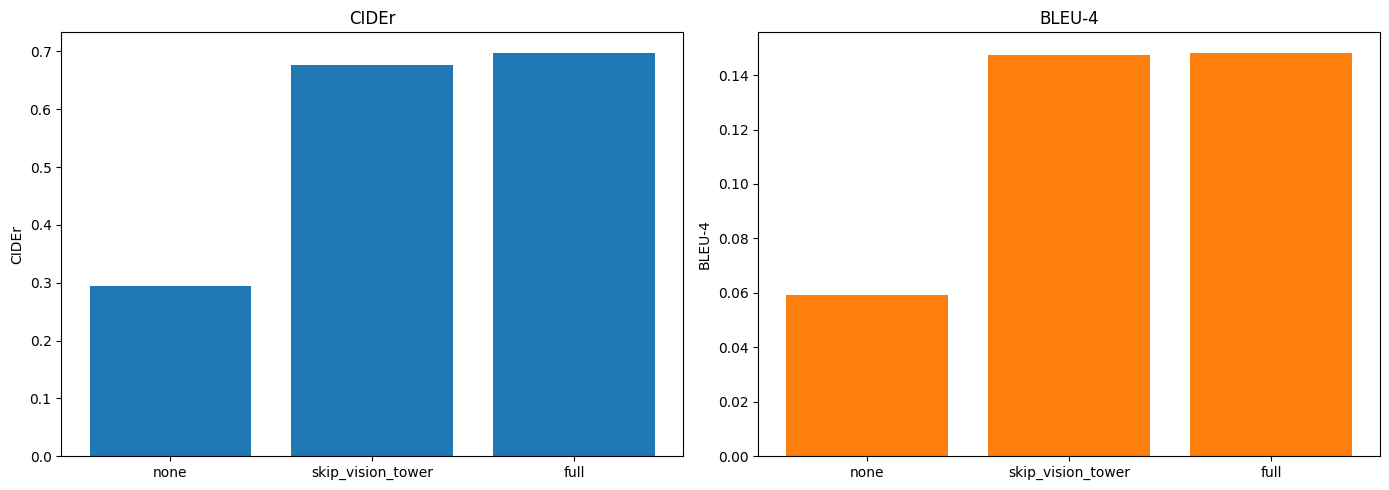

In [5]:
plot_eval_summary(results)

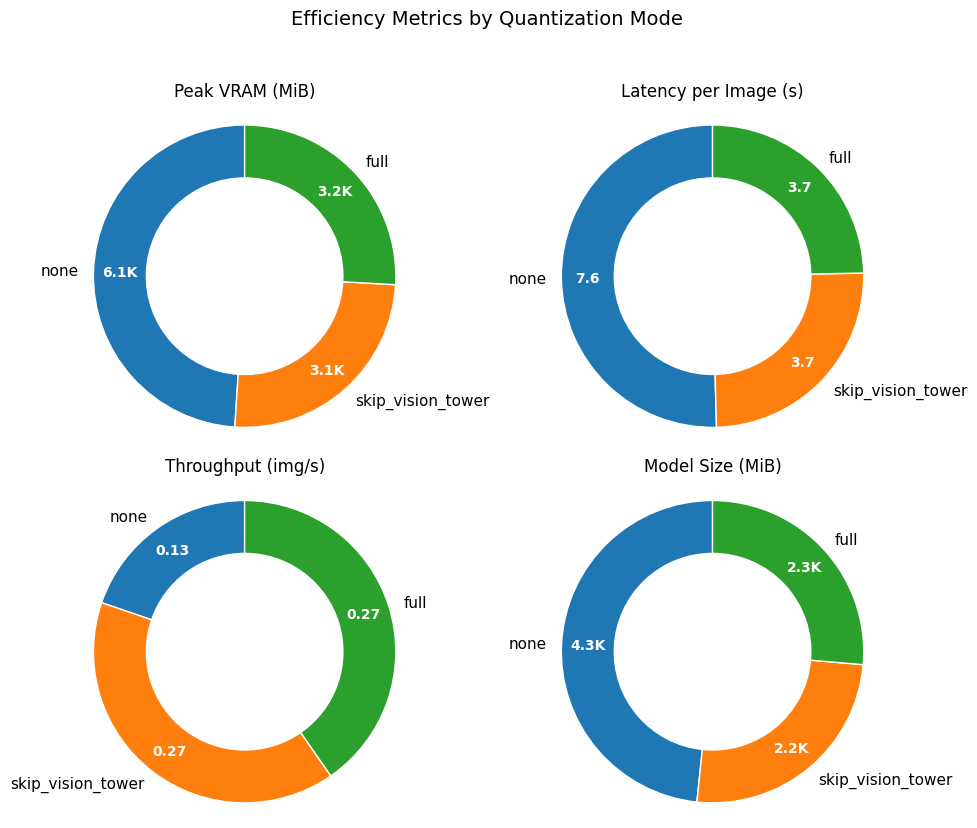

In [6]:
plot_efficiency_pies(metrics)

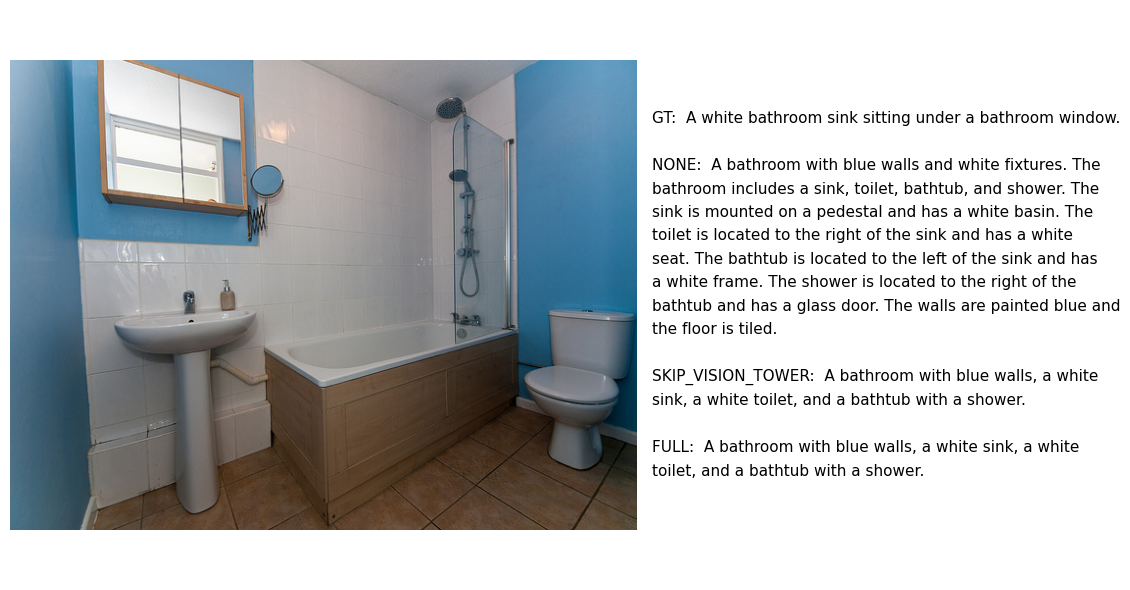

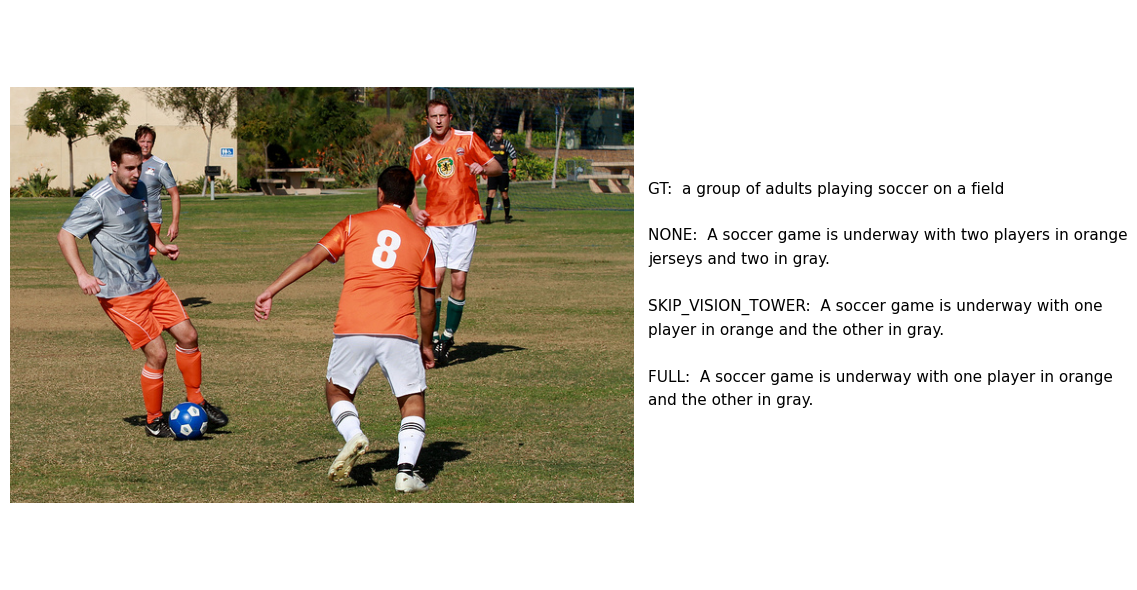

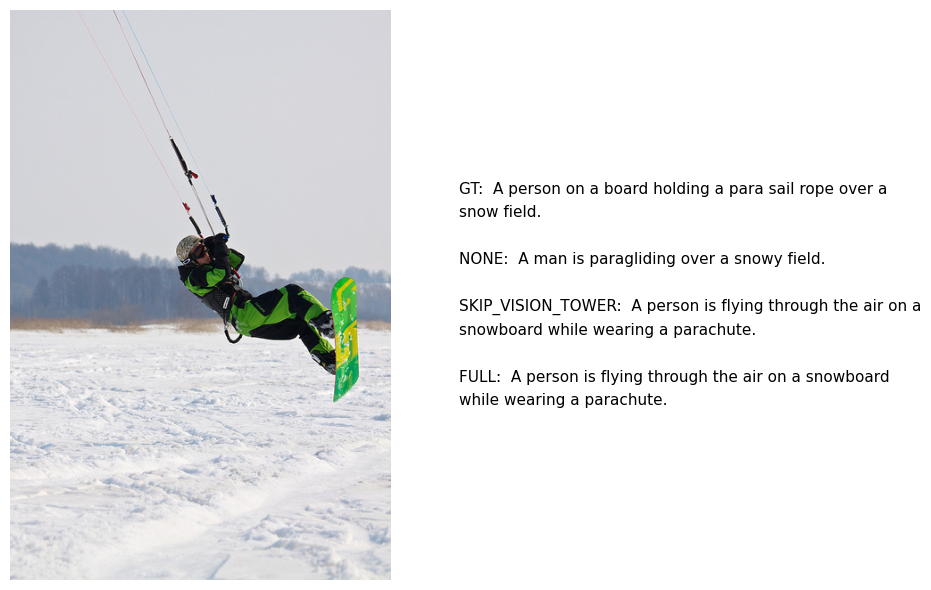

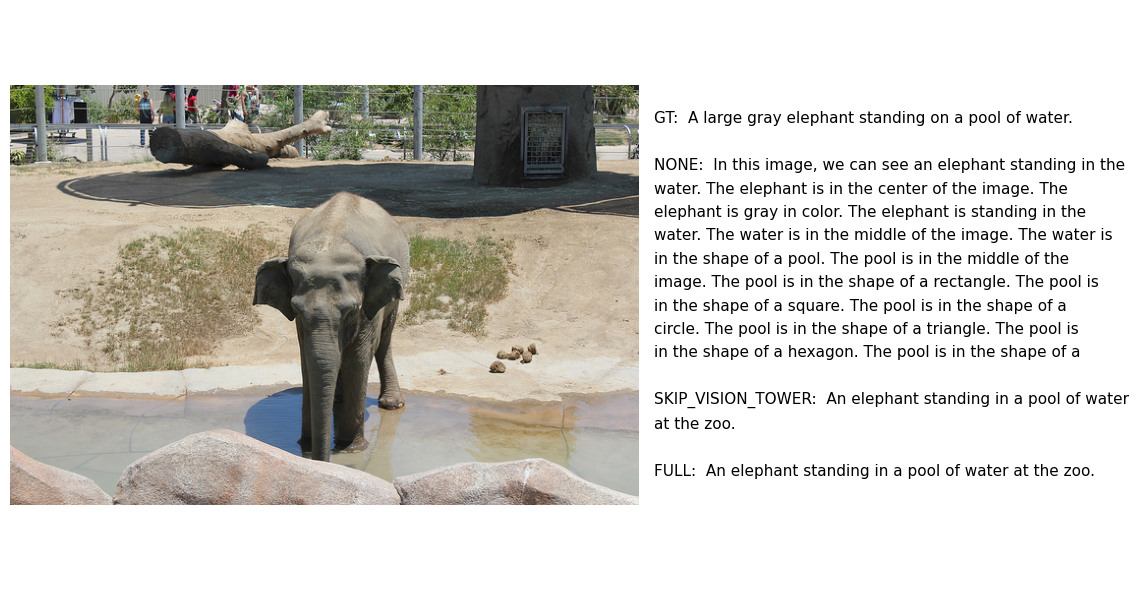

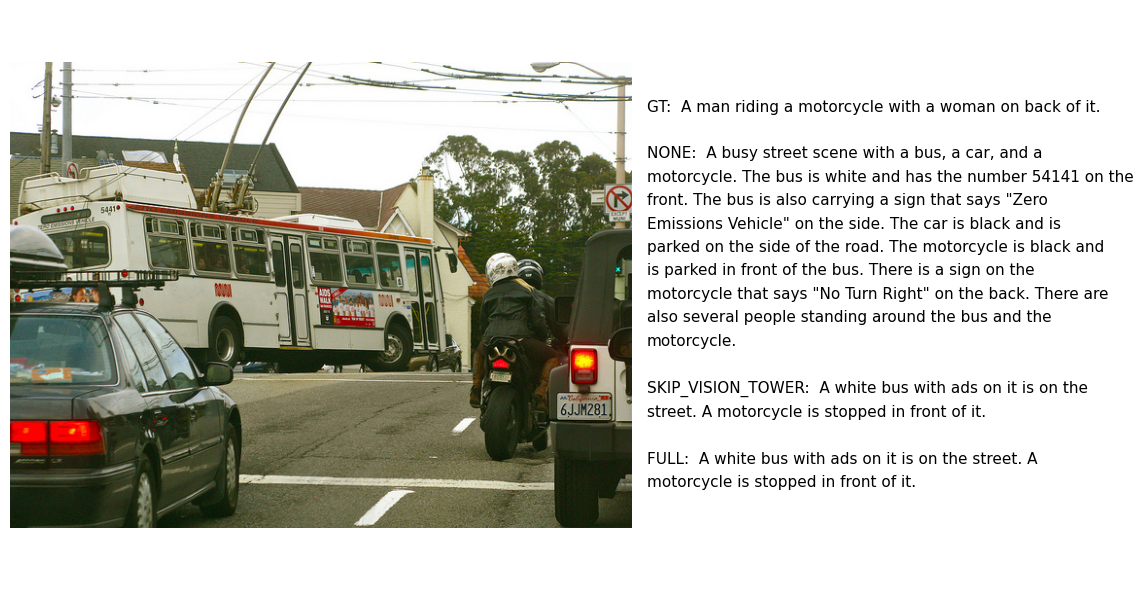

In [7]:
show_example_captions(num_examples=5, seed=1)